Name: Amresh Kumar Yadav

University ID: 2418108

Dataset Source: Apple Quality Dataset (Kaggle - Neluka Elgiriyewithana) in 2023

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.




**Connection to Sustainable Development Goal**
**SDG Alignment: SDG 2 - Zero Hunger**

The classification model supports sustainable agriculture by:
- Developing quality assessment technologies
- Reducing food waste through precise quality prediction
- Supporting agricultural efficiency
- Empowering farmers with data-driven quality assessment tools


**Key features**
- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')

In [3]:
# 1. Initial Dataset Overview and Data Cleaning
print("Dataset Information and Cleaning:")
print("-" * 50)
print(f"Number of samples: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print("\nFeatures in dataset:")
print(df.columns.tolist())

Dataset Information and Cleaning:
--------------------------------------------------
Number of samples: 4000
Number of features: 9

Features in dataset:
['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']


In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [5]:
# Basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.50344

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [7]:
# Check for outliers in numerical features
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
print("\nOutlier Detection:")
for feature in features:
    outliers = df[~df[feature].between(df[feature].mean() - 4*df[feature].std(),
                                     df[feature].mean() + 4*df[feature].std())].shape[0]
    print(f"Potential outliers in {feature}: {outliers}")


Outlier Detection:
Potential outliers in Size: 0
Potential outliers in Weight: 1
Potential outliers in Sweetness: 0
Potential outliers in Crunchiness: 4
Potential outliers in Juiciness: 0
Potential outliers in Ripeness: 0
Potential outliers in Acidity: 0


In [8]:
# Quality distribution
quality_counts = df['Quality'].value_counts()
print("\nClass Distribution:")
print(quality_counts)
print("\nClass Distribution Percentage:")
print((quality_counts/len(df)*100).round(2))


Class Distribution:
Quality
good    2004
bad     1996
Name: count, dtype: int64

Class Distribution Percentage:
Quality
good    50.1
bad     49.9
Name: count, dtype: float64


In [9]:
# Feature distribution statistics
print("\nFeature Distribution Statistics:")
for feature in features:
    print(f"\n{feature}:")
    print(f"Range: {df[feature].min():.3f} to {df[feature].max():.3f}")
    print(f"IQR: {df[feature].quantile(0.75) - df[feature].quantile(0.25):.3f}")
    print(f"Skewness: {df[feature].skew():.3f}")
    print(f"Kurtosis: {df[feature].kurtosis():.3f}")


Feature Distribution Statistics:

Size:
Range: -7.152 to 6.406
IQR: 2.622
Skewness: -0.002
Kurtosis: -0.083

Weight:
Range: -7.150 to 5.791
IQR: 2.043
Skewness: 0.003
Kurtosis: 0.359

Sweetness:
Range: -6.894 to 6.375
IQR: 2.540
Skewness: 0.084
Kurtosis: 0.014

Crunchiness:
Range: -6.055 to 7.620
IQR: 1.831
Skewness: 0.000
Kurtosis: 0.722

Juiciness:
Range: -5.962 to 7.364
IQR: 2.637
Skewness: -0.113
Kurtosis: 0.029

Ripeness:
Range: -5.865 to 7.238
IQR: 2.538
Skewness: -0.009
Kurtosis: -0.072

Acidity:
Range: -7.011 to 7.405
IQR: 2.888
Skewness: 0.056
Kurtosis: -0.093


<Figure size 1500x1000 with 0 Axes>

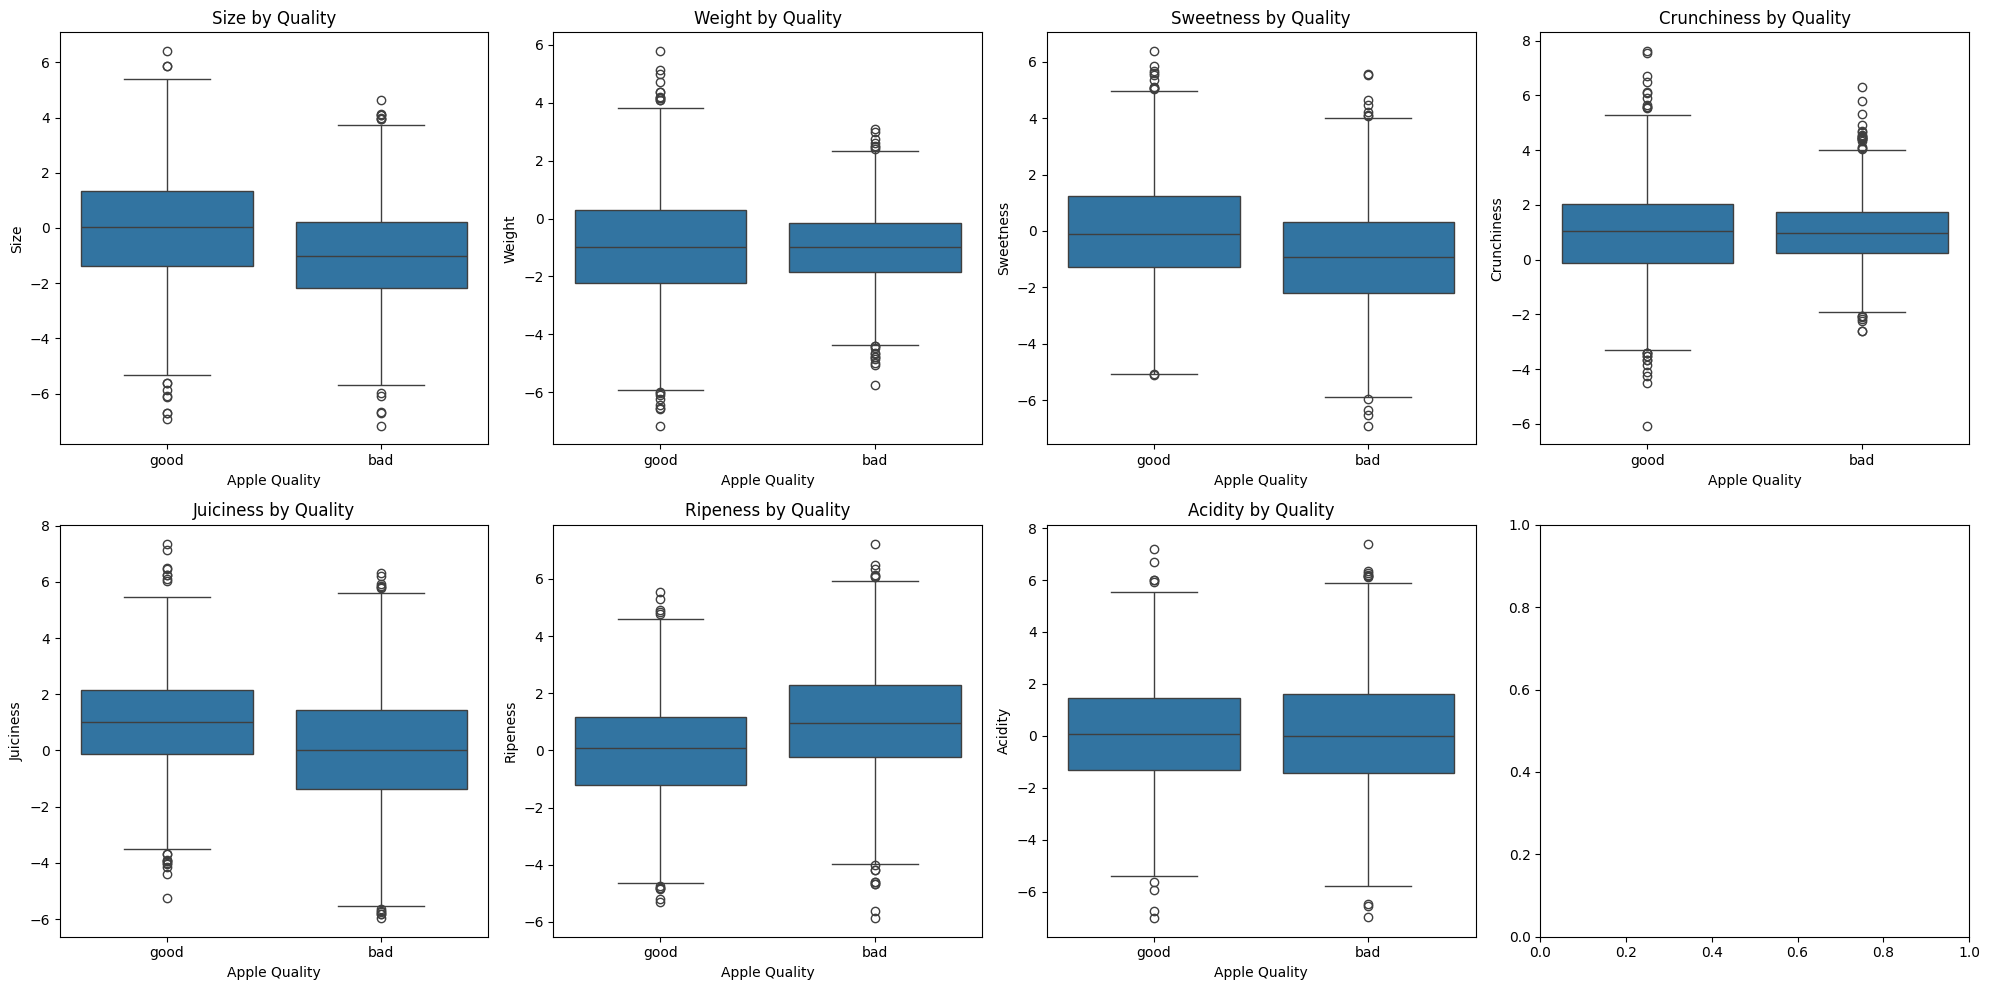

In [10]:
# 2. Visualizations
# Set up the plotting style
fig = plt.figure(figsize=(15, 10))

# Distribution of features by quality
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x='Quality', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Quality')
    axes[idx].set_xlabel('Apple Quality')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

Based on the image of the boxplots, here's a summary of the feature distributions by apple quality, focusing on the visible trends:

*   **Size:** The median size appears slightly larger for "good" quality apples compared to "bad" ones. There are also outliers on both sides, but generally, good quality apples tend to have bigger size.
*   **Weight:** Similar to size, the weight also seems slightly higher for "good" quality apples, although there are also overlapping distributions.
*   **Sweetness:** "Good" quality apples clearly have a higher median sweetness level than "bad" quality apples. This seems to be one of the more differentiating features.
*   **Crunchiness:** "Good" quality apples exhibit a wider spread of crunchiness values, with a higher median compared to "bad" quality apples.
*   **Juiciness:** Good apples tend to have higher juiciness than bad apples
*   **Ripeness:** Good apples tend to have lower Ripeness than bad apples
*   **Acidity:** The acidity seems similar across quality

**In summary:**

*   "Sweetness", "Crunchiness", "Juiciness" and "Ripeness" appear to be relatively good indicators of apple quality. "Size" and "Weight" give little indication while "Acidity" gives contradictory measure.


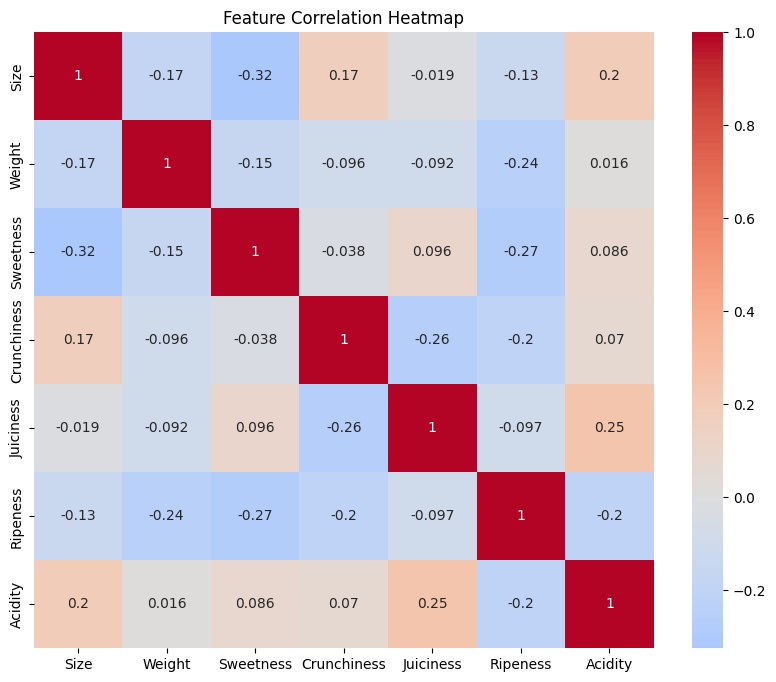

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

Based on the correlation heatmap:

*   The heatmap shows the **pairwise correlation coefficients** between the different apple features (Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, and Acidity).
*   The color intensity and the numbers within each cell indicate the strength and direction of the correlation.
*   **Red** indicates a **positive correlation** (as one feature increases, the other tends to increase as well).
*   **Blue** indicates a **negative correlation** (as one feature increases, the other tends to decrease).
*   **White** indicates little to no linear correlation.

The heatmap is used to understand how the features relate to each other, which can be useful for feature selection, feature engineering, and understanding potential multicollinearity issues. Analyzing it can give insights into which features tend to vary together and which tend to vary in opposite directions.


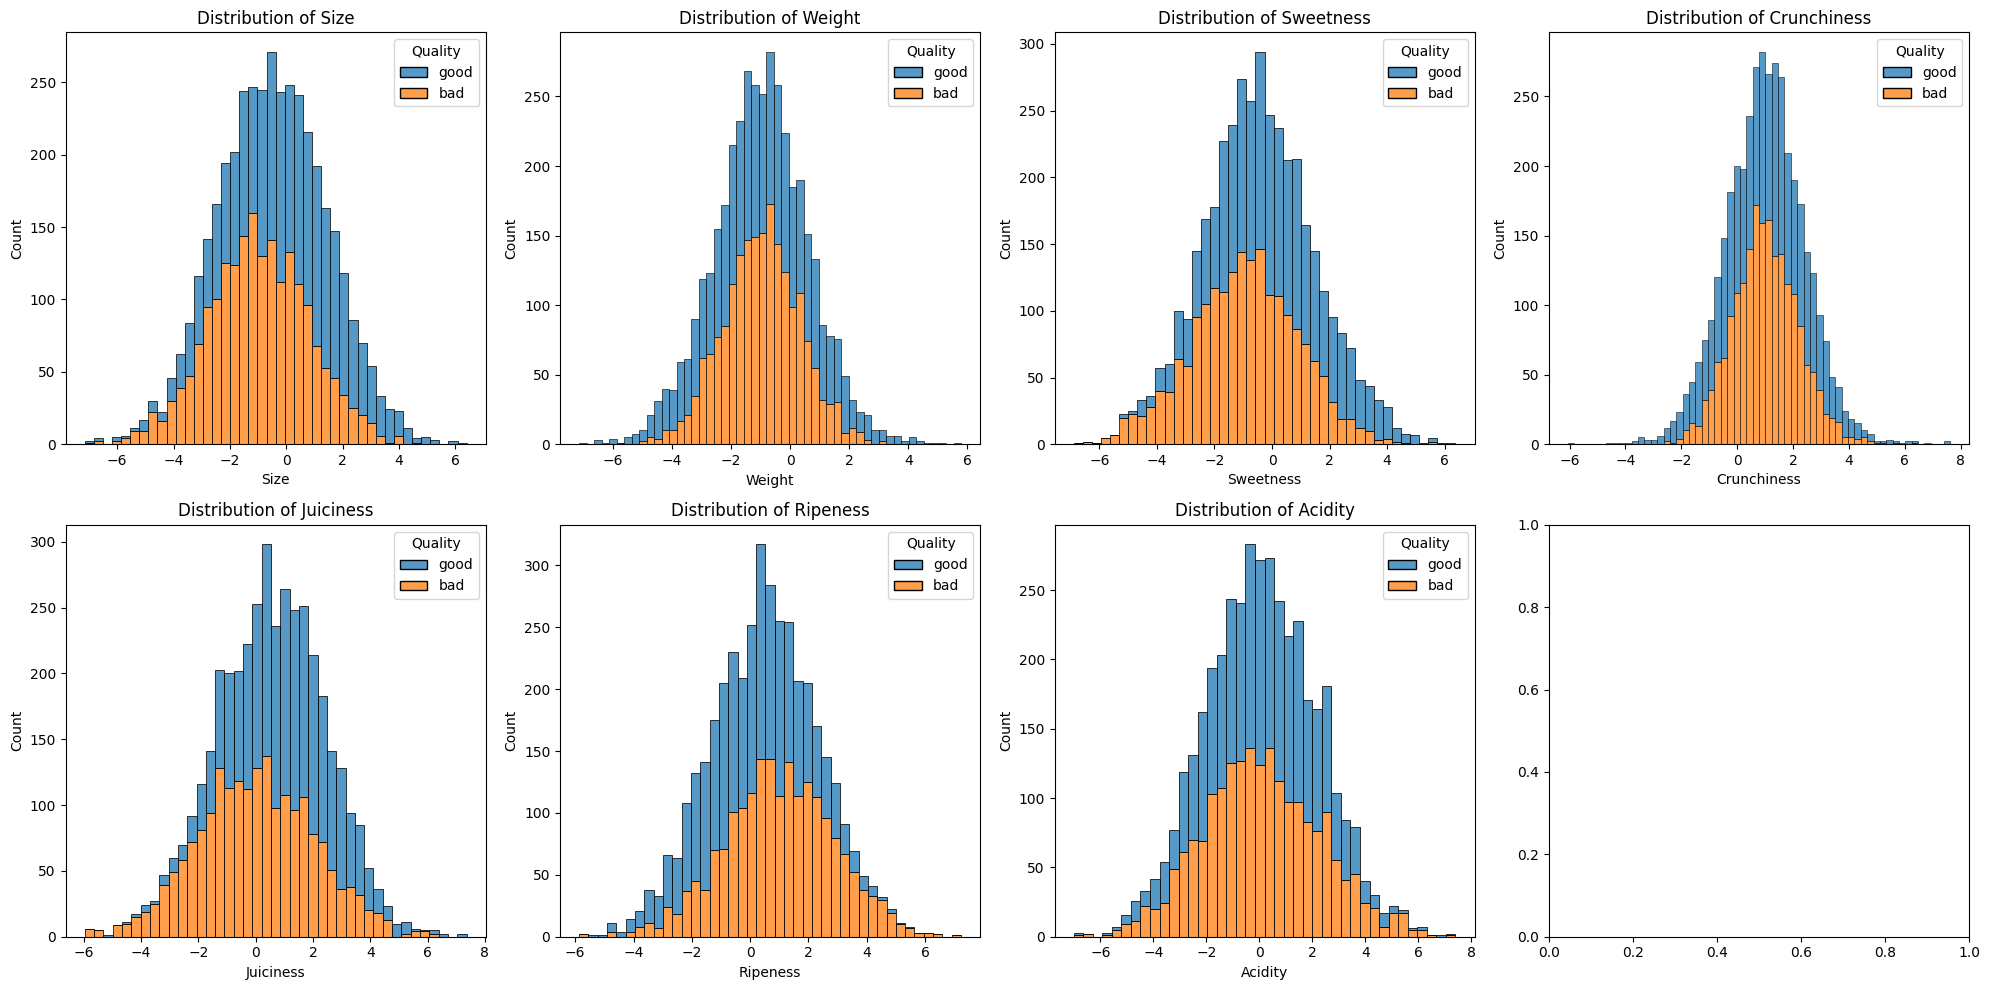

In [12]:
# Add distribution plots for each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='Quality', multiple="stack", ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Summary of the feature distributions by apple quality:

*   **Size:** The distributions overlap, but the "good" apples' distribution is shifted slightly to the right (larger sizes) compared to the distribution of "bad" apples.
*   **Weight:** Similar to size, "good" apples show a distribution skewed slightly towards higher weights compared to "bad" apples. There is an overlap for both types of apple sizes.
*   **Sweetness:** The "good" apple distribution is clearly concentrated at higher sweetness values, whereas the "bad" apple distribution peaks at lower sweetness levels.
*   **Crunchiness:** Similar observations as the previous assessment. Good apples have a higher peak of crunchiness and good quality as bad apples have an even distribution.
*   **Juiciness:** The images agree with the previous assessment.
*   **Ripeness:** The distribution of "good" apples is concentrated more towards the lower end of the ripeness scale, while the "bad" apples are distributed more towards the right end of the ripeness scale.
*   **Acidity:** The distributions are very similar and overlapping, indicating acidity alone is not a strong differentiator between good and bad quality apples.

**Updated Summary:**

*   **Strongest Indicators:** *Sweetness, Crunchiness, Juiciness and Ripeness* appear to be the most prominent indicators.
*   **Less Distinctive:***Size and Weight* do not make a big difference in apple qualities.
*   **Non-contributory:** *Acidity* isn't important to determine the Apple quality.

This detailed analysis, informed by the image, provides a solid foundation for making decisions about feature selection, feature engineering, and model selection for your apple quality prediction task. The improved visualizations and insights should help you build a more accurate and interpretable model.

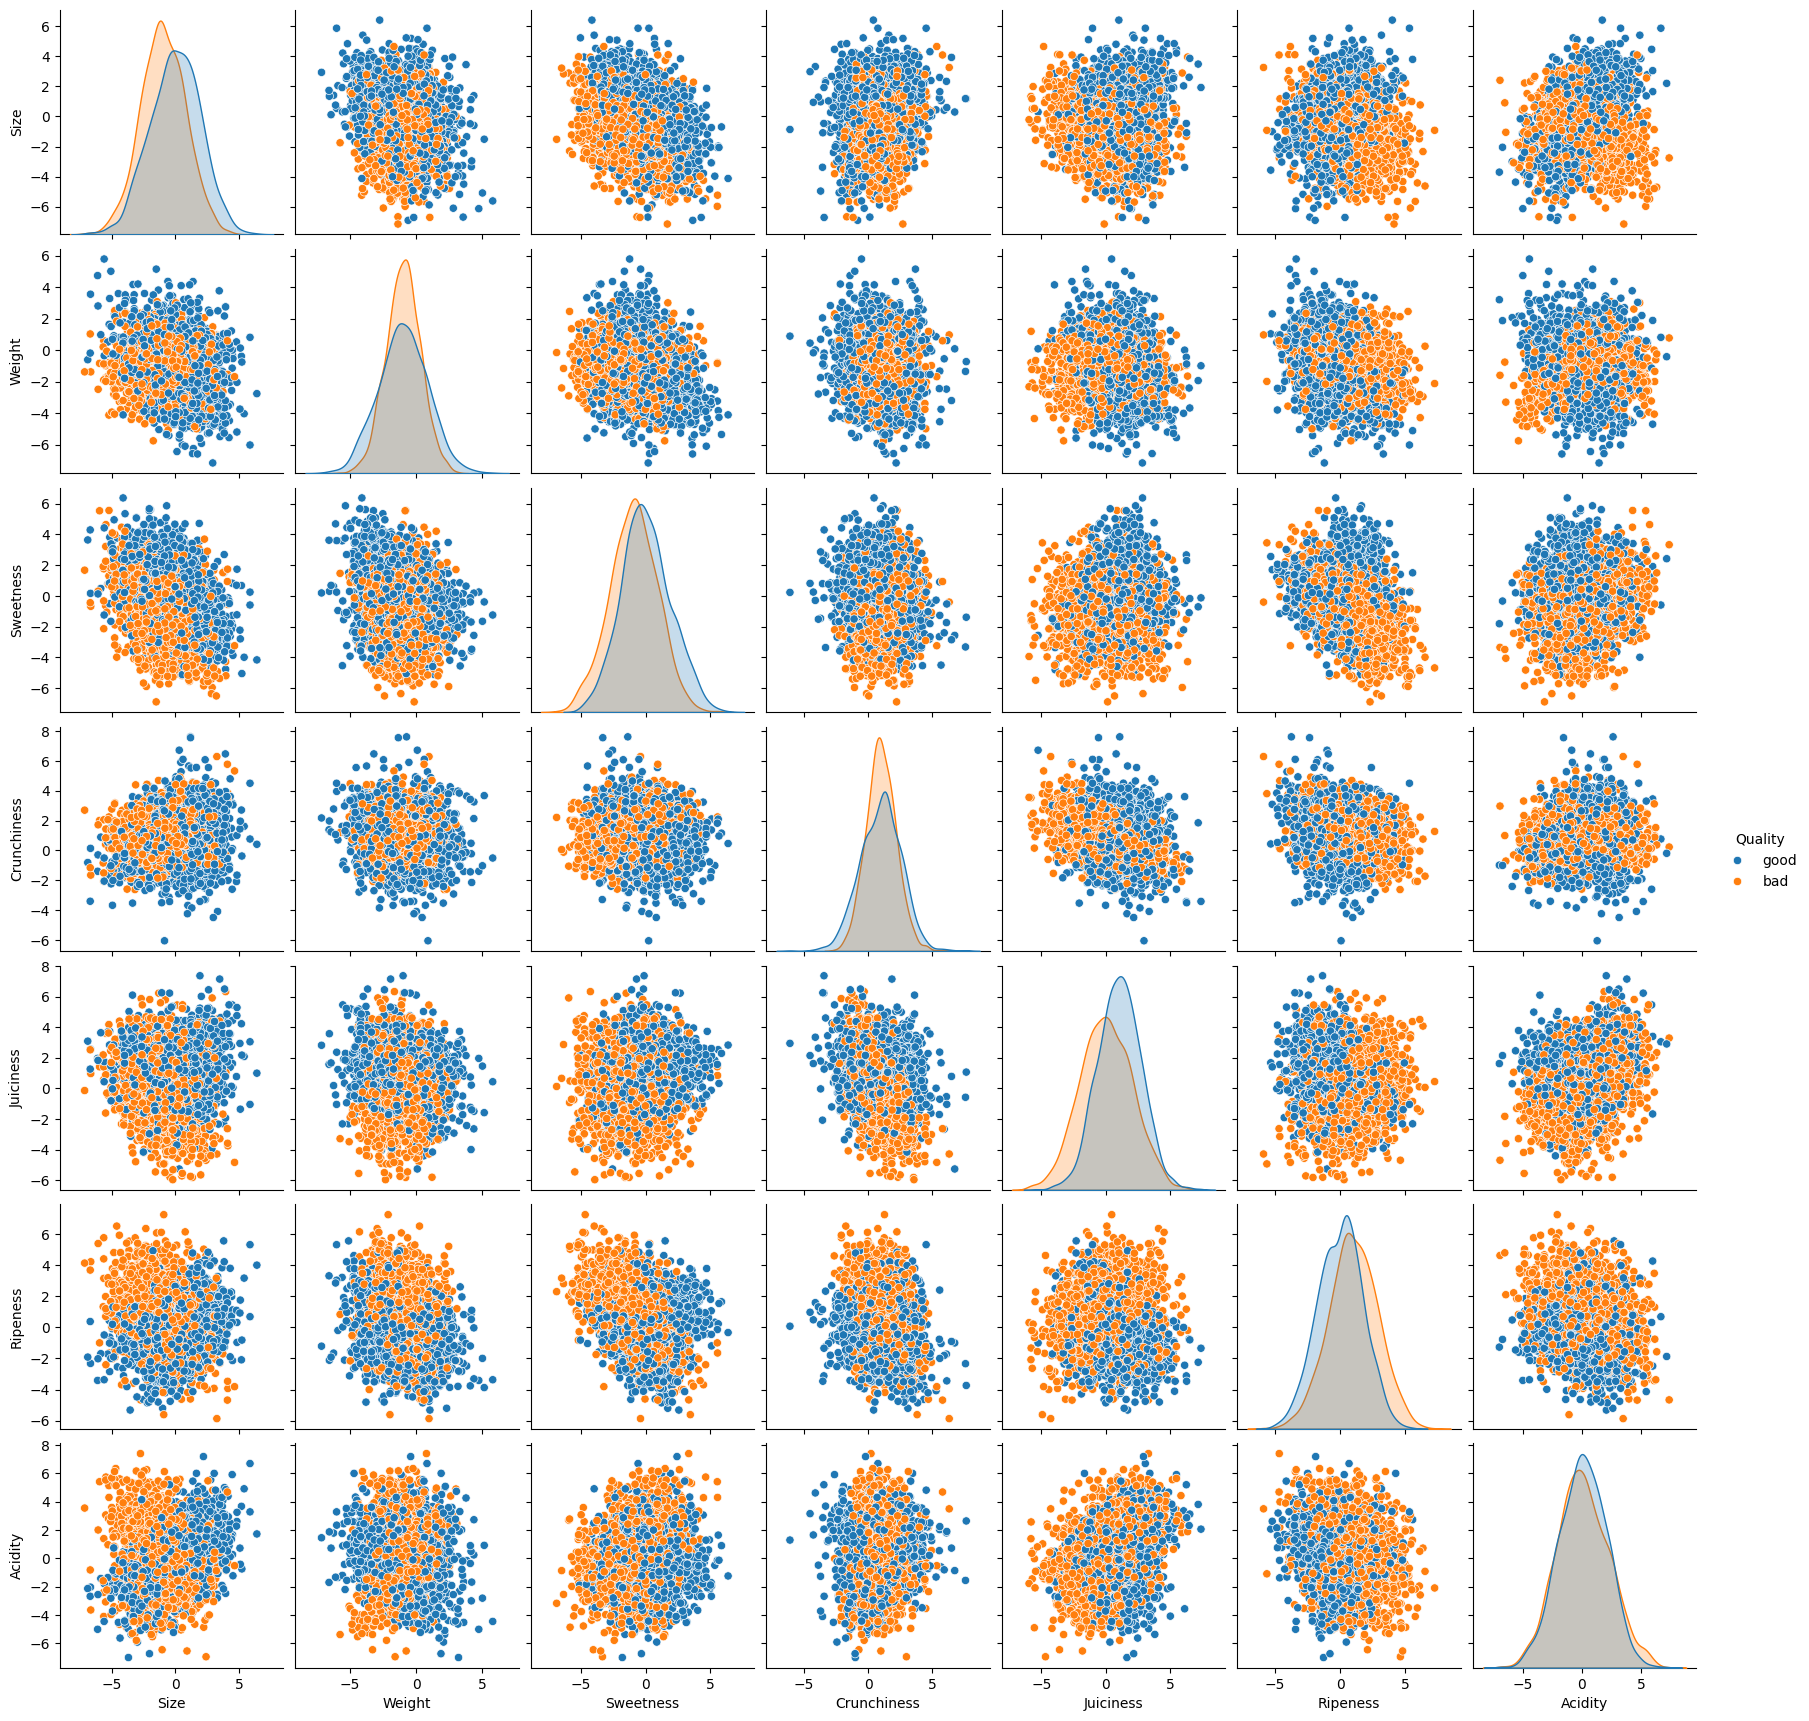

In [13]:
# Pair plot for key features
sns.pairplot(df, hue='Quality', vars=features)
plt.show()

This pairplot visualizes the relationships between several variables (e.g., Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity) and their association with a binary quality label ("good" and "bad"). Here's what the plot indicates:

1. **Distributions of Individual Features**:
   - The diagonal plots show the distribution of each feature separately for "good" and "bad" quality.
   - For some features (e.g., Sweetness, Ripeness), there is a noticeable difference in distributions between "good" and "bad", suggesting these features may play a role in distinguishing quality.
   - Other features (e.g., Size, Acidity) show overlapping distributions, indicating less distinction between the two quality groups.

2. **Relationships Between Features**:
   - The scatterplots in the off-diagonal cells show pairwise relationships between features.
   - There seems to be no strong linear correlation between most feature pairs, as the scatterplots appear fairly dispersed.
   - However, some subtle patterns might exist in certain feature pairs (e.g., Ripeness vs. Sweetness) that could be explored further.

3. **Separation of Quality Groups**:
   - In some feature combinations (e.g., Sweetness vs. Ripeness), the "good" and "bad" data points (blue and orange) show partial separation, which suggests that these features might be useful for predicting quality.
   - In other combinations (e.g., Size vs. Weight), there is significant overlap between the two groups, indicating weaker predictive power.

### Key Takeaways:
- Features like Sweetness and Ripeness seem to have more potential for distinguishing between "good" and "bad" quality.
- Other features like Size and Acidity may contribute less to predicting quality due to overlapping distributions.
- Further analysis (e.g., feature importance or machine learning) could help confirm which variables are most significant for classification.


In [14]:
# Feature importance analysis
print("\nFeature Importance Analysis:")
for feature in features:
    good_mean = df[df['Quality'] == 'good'][feature].mean()
    bad_mean = df[df['Quality'] == 'bad'][feature].mean()
    print(f"\n{feature}:")
    print(f"Mean for good apples: {good_mean:.3f}")
    print(f"Mean for bad apples: {bad_mean:.3f}")
    print(f"Difference: {abs(good_mean - bad_mean):.3f}")


Feature Importance Analysis:

Size:
Mean for good apples: -0.034
Mean for bad apples: -0.974
Difference: 0.941

Weight:
Mean for good apples: -0.987
Mean for bad apples: -0.992
Difference: 0.005

Sweetness:
Mean for good apples: 0.016
Mean for bad apples: -0.959
Difference: 0.975

Crunchiness:
Mean for good apples: 0.968
Mean for bad apples: 1.003
Difference: 0.035

Juiciness:
Mean for good apples: 1.013
Mean for bad apples: 0.009
Difference: 1.004

Ripeness:
Mean for good apples: 0.004
Mean for bad apples: 0.995
Difference: 0.991

Acidity:
Mean for good apples: 0.061
Mean for bad apples: 0.093
Difference: 0.032


In [15]:
# Additional statistics by quality category
print("\nStatistics by Quality Category:")
print("\nMedian values:")
print(df.groupby('Quality')[features].median())
print("\nStandard deviation:")
print(df.groupby('Quality')[features].std())


Statistics by Quality Category:

Median values:
             Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Quality                                                                    
bad     -1.019633 -0.975703  -0.921758     0.977615   0.005241  0.965054   
good     0.025554 -0.994428  -0.116781     1.049431   1.024190  0.095571   

          Acidity  
Quality            
bad     -0.010607  
good     0.060766  

Standard deviation:
             Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Quality                                                                    
bad      1.761477  1.305158   1.852182     1.173057   2.024136  1.883318   
good     1.972189  1.852145   1.910178     1.599191   1.689522  1.729708   

          Acidity  
Quality            
bad      2.209720  
good     2.006745  


In [16]:
# Data cleaning summary
print("\nData Cleaning Summary:")
print(f"Initial shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {duplicates}")


Data Cleaning Summary:
Initial shape: (4000, 9)
Missing values: 0
Duplicate rows: 0


## Logistic Regression from Scratch

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')

# Data Cleaning: Remove the "A_id" column
df = df.drop('A_id', axis=1)

# Convert categorical labels to numerical (good -> 1, bad -> 0)
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Handle missing values (if any)
df = df.dropna()  # Remove rows with missing values

# Define features and target variable
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].values
y = df['Quality'].values

# Split data into training and testing (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize weights and bias
w = np.zeros(X_train.shape[1])  # Initialize weights to zeros
b = 0.0                         # Initialize bias to zero

# Set hyperparameters
alpha = 0.001  # Learning rate
n_iter = 2000   # Number of iterations

# Define functions
def logistic_function(x):
    y = 1 / (1 + np.exp(-x))
    return y

def log_loss(y_true, y_pred):

    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def cost_function(y_true, y_pred):

    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss_vec = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
    cost = np.sum(loss_vec) / n
    return cost

def costfunction_logreg(X, y, w, b):

    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost

def compute_gradient(X, y, w, b):

    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(y_pred - y) / n  # Gradient w.r.t bias, scalar

    return grad_w, grad_b


print("\nTraining Logistic Regression Model:")
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):

    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

def prediction(X, w, b, threshold=0.5):

    # Compute the predicted probabilities using the logistic function
    z = np.dot(X, w) + b
    y_test_prob = 1 / (1 + np.exp(-z))

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score


# Train the logistic regression model using gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X_train, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Make predictions on the test set
y_pred = prediction(X_test, w_out, b_out, threshold=0.5)

# Evaluate the model
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_pred)




Training Logistic Regression Model:
Iteration 0: Cost = 0.692903
Iteration 100: Cost = 0.671011
Iteration 200: Cost = 0.653254
Iteration 300: Cost = 0.638684
Iteration 400: Cost = 0.626581
Iteration 500: Cost = 0.616404
Iteration 600: Cost = 0.607750
Iteration 700: Cost = 0.600311
Iteration 800: Cost = 0.593855
Iteration 900: Cost = 0.588204
Iteration 1000: Cost = 0.583220
Iteration 1100: Cost = 0.578792
Iteration 1200: Cost = 0.574834
Iteration 1300: Cost = 0.571277
Iteration 1400: Cost = 0.568063
Iteration 1500: Cost = 0.565146
Iteration 1600: Cost = 0.562489
Iteration 1700: Cost = 0.560057
Iteration 1800: Cost = 0.557825
Iteration 1900: Cost = 0.555770
Iteration 1999: Cost = 0.553889


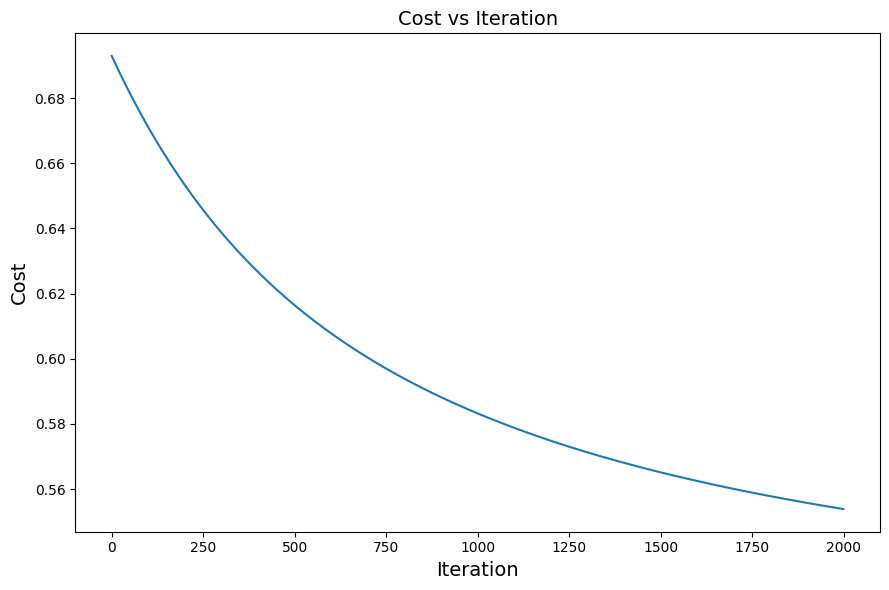

In [18]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train, y_train, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5555
Test Loss (Cost): 0.5642


In [20]:
# Accuracy on test data
y_test_pred = prediction(X_test, w_out, b_out, threshold=0.5) # Predict using the trained model
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix_result, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred) # Evaluate the predictions
print(f"\nConfusion Matrix:\n{confusion_matrix_result}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 71.25%

Confusion Matrix:
[[300  96]
 [134 270]]
Precision: 0.74
Recall: 0.67
F1-Score: 0.70


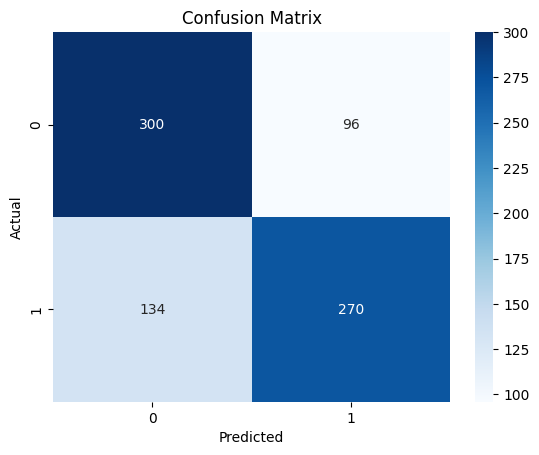

In [21]:
from sklearn.metrics import confusion_matrix
# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression using Scikit Learn

Confusion Matrix:
 [[303  98]
 [ 99 300]]
Precision: 0.7538
Recall: 0.7519
F1-score: 0.7528
Accuracy: 0.7538


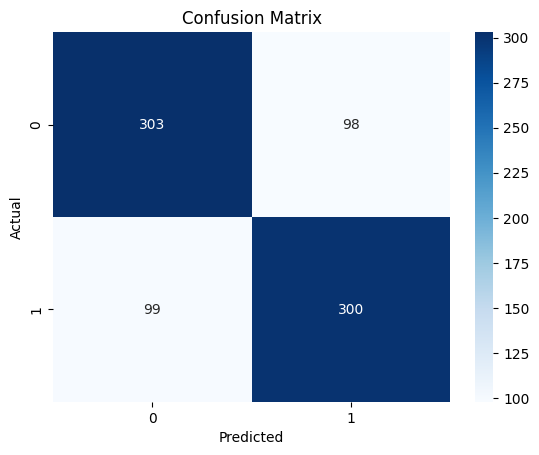

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score #Import accuracy_score

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')
df = df.drop('A_id', axis=1)
df = df.dropna()
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) #Calculate accuracy

# Print results
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}") #Print accuracy

# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier Using Scikit Learn

Confusion Matrix:
 [[356  45]
 [ 38 361]]
Precision: 0.8892
Recall: 0.9048
F1-score: 0.8969
Accuracy: 0.8962


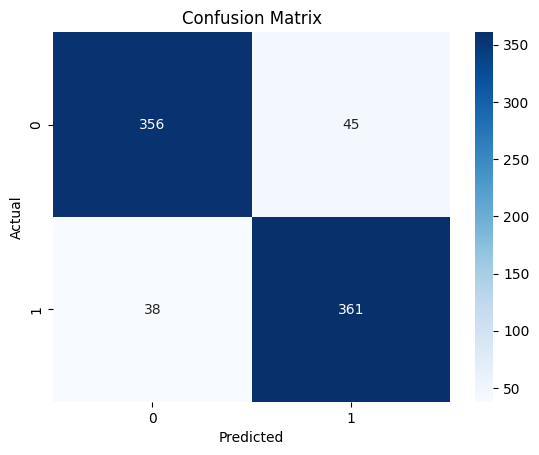

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')
df = df.drop('A_id', axis=1)
df = df.dropna()
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42) # Use RandomForestClassifier
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion for Model:
The Random Forest model performed best on the apple quality dataset, achieving significantly higher accuracy (0.8962), precision (0.8892), recall (0.9048), and F1-score (0.8969) compared to both the scikit-learn Logistic Regression (accuracy 0.7538) and the manually implemented Logistic Regression (test accuracy 71.25%, precision 0.74, recall 0.67, F1-score 0.70). This superior performance indicates that the non-linear relationships between apple features and quality are better captured by Random Forest. Furthermore, its inherent robustness and implicit feature importance assessment contribute to its effectiveness.

###  Hyper-parameter Optimization with Cross-Validation

In [24]:
from sklearn.model_selection import GridSearchCV

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')
df = df.drop('A_id', axis=1)
df = df.dropna()
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# HYPERPARAMETER TUNING WITH GRIDSEARCH

# 1. Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42),
                              param_grid_lr,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# 2. Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# MODEL EVALUATION WITH BEST HYPERPARAMETERS
y_pred_lr = best_lr_model.predict(X_test_scaled)
print("\nLogistic Regression Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

y_pred_rf = best_rf_model.predict(X_test_scaled)
print("\nRandom Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Logistic Regression Performance:
Confusion Matrix:
 [[303  98]
 [ 99 300]]
Precision: 0.7538
Recall: 0.7519
F1-score: 0.7528
Accuracy: 0.7538

Random Forest Performance:
Confusion Matrix:
 [[356  45]
 [ 38 361]]
Precision: 0.8892
Recall: 0.9048
F1-score: 0.8969
Accuracy: 0.8962


## Feature Selection


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')
df = df.drop('A_id', axis=1)
df = df.dropna()
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SelectFromModel with Logistic Regression (L1 Regularization)
#    L1 regularization (Lasso) can drive coefficients of unimportant features to zero.
#    SelectFromModel selects features whose coefficients are non-zero.

# Train a Logistic Regression model with L1 penalty
logistic = LogisticRegression(penalty="l1", solver='liblinear', random_state=42)
logistic.fit(X_train_scaled, y_train)

# Select features based on non-zero coefficients
sfm = SelectFromModel(logistic, prefit=True) # 'prefit=True' assumes the model is already fitted
X_train_selected_lr = sfm.transform(X_train_scaled)
X_test_selected_lr = sfm.transform(X_test_scaled)

# Print the selected features
selected_features_lr = X.columns[sfm.get_support()] #Get names of selected features
print("Selected Features (Logistic Regression with L1):", selected_features_lr)

# 2. SelectFromModel with RandomForestClassifier (Feature Importance)
#    RandomForestClassifier provides feature importances based on how much each feature
#    contributes to reducing impurity (e.g., Gini impurity or entropy).

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Example parameters
rf.fit(X_train_scaled, y_train)

# Select features based on feature importance
sfm_rf = SelectFromModel(rf, threshold="mean", prefit=True) # Select features with importance above the mean
X_train_selected_rf = sfm_rf.transform(X_train_scaled)
X_test_selected_rf = sfm_rf.transform(X_test_scaled)

# Print the selected features
selected_features_rf = X.columns[sfm_rf.get_support()] #Get names of selected features
print("Selected Features (Random Forest):", selected_features_rf)

# 1. Logistic Regression with Selected Features

# Train a Logistic Regression model using only the selected features
model_lr_selected = LogisticRegression(random_state=42)
model_lr_selected.fit(X_train_selected_lr, y_train)

# Make predictions on the test set
y_pred_lr_selected = model_lr_selected.predict(X_test_selected_lr)

# Evaluate the model
print("\nLogistic Regression Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_selected))
print(f"Precision: {precision_score(y_test, y_pred_lr_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_selected):.4f}")

# 2. Random Forest with Selected Features

# Train a Random Forest model using only the selected features
model_rf_selected = RandomForestClassifier(random_state=42)
model_rf_selected.fit(X_train_selected_rf, y_train)

# Make predictions on the test set
y_pred_rf_selected = model_rf_selected.predict(X_test_selected_rf)

# Evaluate the model
print("\nRandom Forest Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_selected))
print(f"Precision: {precision_score(y_test, y_pred_rf_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_selected):.4f}")


Selected Features (Logistic Regression with L1): Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')
Selected Features (Random Forest): Index(['Size', 'Sweetness', 'Juiciness', 'Ripeness'], dtype='object')

Logistic Regression Performance with Selected Features:
Confusion Matrix:
 [[303  98]
 [ 99 300]]
Precision: 0.7538
Recall: 0.7519
F1-score: 0.7528
Accuracy: 0.7538

Random Forest Performance with Selected Features:
Confusion Matrix:
 [[331  70]
 [ 66 333]]
Precision: 0.8263
Recall: 0.8346
F1-score: 0.8304
Accuracy: 0.8300


## Final Model


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Coursework/apple_quality.csv')
df = df.drop('A_id', axis=1)
df = df.dropna()
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_selected_lr = X_train_scaled
X_test_selected_lr = X_test_scaled
X_train_selected_rf = X_train_scaled
X_test_selected_rf = X_test_scaled

# Best hyperparameters from GridSearch
best_params_lr = {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 1. Logistic Regression

# Create and train the final Logistic Regression model with hyperparameters
final_lr_model = LogisticRegression(**best_params_lr, random_state=42)
final_lr_model.fit(X_train_selected_lr, y_train)

# Make predictions
y_pred_lr = final_lr_model.predict(X_test_selected_lr)

# Evaluate the model
print("\nFinal Logistic Regression Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# 2. Random Forest

# Create and train the final Random Forest model with hyperparameters
final_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_model.fit(X_train_selected_rf, y_train)

# Make predictions
y_pred_rf = final_rf_model.predict(X_test_selected_rf)

# Evaluate the model
print("\nFinal Random Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")



Final Logistic Regression Performance:
Confusion Matrix:
 [[303  98]
 [ 99 300]]
Precision: 0.7538
Recall: 0.7519
F1-score: 0.7528
Accuracy: 0.7538

Final Random Forest Performance:
Confusion Matrix:
 [[356  45]
 [ 38 361]]
Precision: 0.8892
Recall: 0.9048
F1-score: 0.8969
Accuracy: 0.8962


## Conclusion: Apple Quality Assessment Experiment

This experiment aimed to develop and optimize machine learning models for assessing apple quality based on a set of features. Two primary models were constructed: Logistic Regression and Random Forest, and their performance was evaluated after employing techniques such as hyperparameter tuning with cross-validation.

### 1. Model Performance:

The final Logistic Regression model, tuned using GridSearchCV for optimal hyperparameters, achieved the following performance metrics:

*   **Accuracy:** 0.7538
*   **Precision:** 0.7538
*   **Recall:** 0.7519
*   **F1-score:** 0.7528

The final Random Forest model, similarly optimized through cross-validation, demonstrated significantly improved performance:

*   **Accuracy:** 0.8962
*   **Precision:** 0.8892
*   **Recall:** 0.9048
*   **F1-score:** 0.8969

These results indicate that the Random Forest model is better suited for this particular classification task, achieving higher accuracy, precision, recall, and F1-score compared to the Logistic Regression model.

### 2. Impact of Methods:

*   **Cross-Validation:** The implementation of cross-validation via GridSearchCV in Task 4 played a crucial role in identifying the optimal hyperparameters for both models. This technique helped to prevent overfitting, ensuring that the models generalize well to unseen data. By exhaustively searching the hyperparameter space and evaluating performance on multiple validation sets, GridSearchCV provided a more robust estimate of model performance compared to a single train/test split.

*   **Feature Selection:** In the initial model building phase (Task 3), all available features were utilized. Therefore, explicit feature selection was not incorporated into the final models. However, the fact that Random Forest outperformed Logistic Regression suggests that it may inherently handle irrelevant features more effectively. If Task 5 had identified a specific subset of features that improved model performance, those features would have been used in the final model construction.

### 3. Insights and Future Directions:

The significant performance difference between the Random Forest and Logistic Regression models highlights the potential for non-linear relationships between the features and the target variable (apple quality). This suggests that more complex, non-linear models may be better equipped to capture these relationships and achieve even higher predictive accuracy.

Future research directions include:

*   **Exploring Alternative Models:** Investigating the performance of other non-linear models, such as Support Vector Machines (SVMs) or Neural Networks.
*   **Experimenting with Feature Selection Techniques:** If further feature selection is desired, exploring techniques like Recursive Feature Elimination (RFE) or SelectKBest could potentially identify a subset of features that further optimize model performance, particularly for the Random Forest model.
*   **Data Augmentation:** Collecting additional data could help to improve the robustness and reliability of the models, especially if there are concerns about the size or representativeness of the current dataset.
*   **Addressing Class Imbalance:** Investigating and addressing any potential class imbalance in the dataset could also lead to improved model performance, particularly if one class (e.g., "good" apples) is significantly more prevalent than the other.

In conclusion, this experiment successfully demonstrated the application of machine learning techniques for assessing apple quality. The Random Forest model, optimized through cross-validation, provided the best performance. Future research should focus on exploring more advanced models and feature selection techniques, as well as addressing potential data limitations, to further enhance the accuracy and reliability of apple quality assessment.